In [1]:
# Import libraries
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Load data and similiarity scores

In [2]:
# Load the similarity scores
with open('data/similarity_scores.pkl', 'rb') as f:
    similarity_scores = pickle.load(f)
similarity_scores

{1: array([0.0000000e+00, 5.0389782e-37, 0.0000000e+00, 0.0000000e+00,
        6.2793769e-34, 0.0000000e+00, 5.6605459e-23, 1.2091713e-35,
        0.0000000e+00, 0.0000000e+00, 6.6157523e-31, 3.2255960e-34,
        1.9591610e-37], dtype=float32),
 2: array([4.8620786e-05, 1.1235002e-03, 9.2691822e-05, 8.3376151e-05,
        2.0452412e-03, 3.6772768e-04, 2.1831617e-03, 1.8321003e-05,
        1.4350055e-03, 9.5292562e-06, 2.9927088e-07, 6.3567219e-05,
        3.0559477e-06], dtype=float32),
 3: array([4.4927153e-14, 2.4151469e-14, 6.3791176e-14, 3.7867509e-12,
        4.9197166e-05, 1.6930646e-05, 4.4067900e-08, 1.8974075e-04,
        5.8931066e-05, 1.0351000e-08, 3.3325062e-10, 3.1290860e-12,
        6.1042305e-09], dtype=float32),
 5: array([1.2985549e-05, 2.3785651e-05, 4.4542239e-03, 4.3707615e-07,
        1.7382376e-05, 1.9089455e-08, 1.0760475e-04, 1.0155519e-05,
        1.5700652e-14, 1.8110020e-14, 2.3294538e-06, 6.3518313e-04,
        7.2204887e-07], dtype=float32),
 6: array([5

In [3]:
path_cutouts_selected = Path("./data/selected_cutouts")

ds_label1 = xr.open_zarr(path_cutouts_selected / "label1_netflora_buriti_emprapa00.zarr").isel(sample=range(37,50)).fillna(0)
ds_label2 = xr.open_zarr(path_cutouts_selected / "label2_netflora_tucuma_emprapa00.zarr").isel(sample=range(16,29)).fillna(0)
ds_label3 = xr.open_zarr(path_cutouts_selected / "label3_reforestree_banana.zarr").isel(sample=range(29,42)).fillna(0)
ds_label4 = xr.open_zarr(path_cutouts_selected / "label5_reforestree_fruit.zarr").isel(sample=range(19,32)).fillna(0)
ds_label_mannual = xr.open_zarr(path_cutouts_selected / "label6_mannual_palmtree.zarr").fillna(0)
ds_label_mannual['Y'] = ds_label_mannual['Y']+6

for ds in [ds_label1, ds_label2, ds_label3, ds_label4, ds_label_mannual]:
    print(f"shape:{ds['X'].sizes}")
    print(f"label:{np.unique(ds['Y'].values)}")
    print("---")

shape:Frozen({'sample': 13, 'x': 128, 'y': 128, 'channel': 3})
label:[1]
---
shape:Frozen({'sample': 13, 'x': 128, 'y': 128, 'channel': 3})
label:[2]
---
shape:Frozen({'sample': 13, 'x': 128, 'y': 128, 'channel': 3})
label:[3]
---
shape:Frozen({'sample': 13, 'x': 128, 'y': 128, 'channel': 3})
label:[5]
---
shape:Frozen({'sample': 9, 'x': 128, 'y': 128, 'channel': 3})
label:[6]
---


In [4]:
# Manually create a map between class text and integer label
class_map = {
    1: "buriti",
    2: "tucuma",
    3: "banana",
    5: "fruit",
    6: "palm_label",
}

class_data = {
    1: ds_label1,
    2: ds_label2,
    3: ds_label3,
    5: ds_label4,
    6: ds_label_mannual,
}
class_data

{1: <xarray.Dataset>
 Dimensions:  (sample: 13, x: 128, y: 128, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(13, 128, 128, 3), meta=np.ndarray>
     Y        (sample) int64 dask.array<chunksize=(13,), meta=np.ndarray>,
 2: <xarray.Dataset>
 Dimensions:  (sample: 13, x: 128, y: 128, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(13, 128, 128, 3), meta=np.ndarray>
     Y        (sample) int64 dask.array<chunksize=(13,), meta=np.ndarray>,
 3: <xarray.Dataset>
 Dimensions:  (sample: 13, x: 128, y: 128, channel: 3)
 Dimensions without coordinates: sample, x, y, channel
 Data variables:
     X        (sample, x, y, channel) float32 dask.array<chunksize=(13, 128, 128, 3), meta=np.ndarray>
     Y        int64 3,
 5: <xarray.Dataset>
 Dimensions:  (sample: 13, x: 128, y: 128, channel: 3

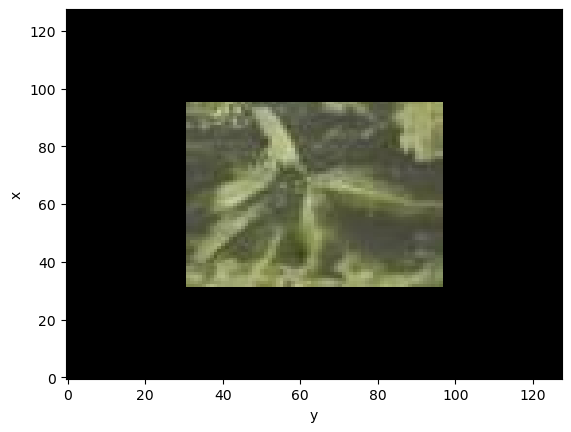

In [5]:
# Load and visualize the test sample
test_sample = ds_label_mannual.isel(sample=0)

# Visualize the test sample
test_sample['X'].astype('int').plot.imshow()

## Plot three most similar images per class

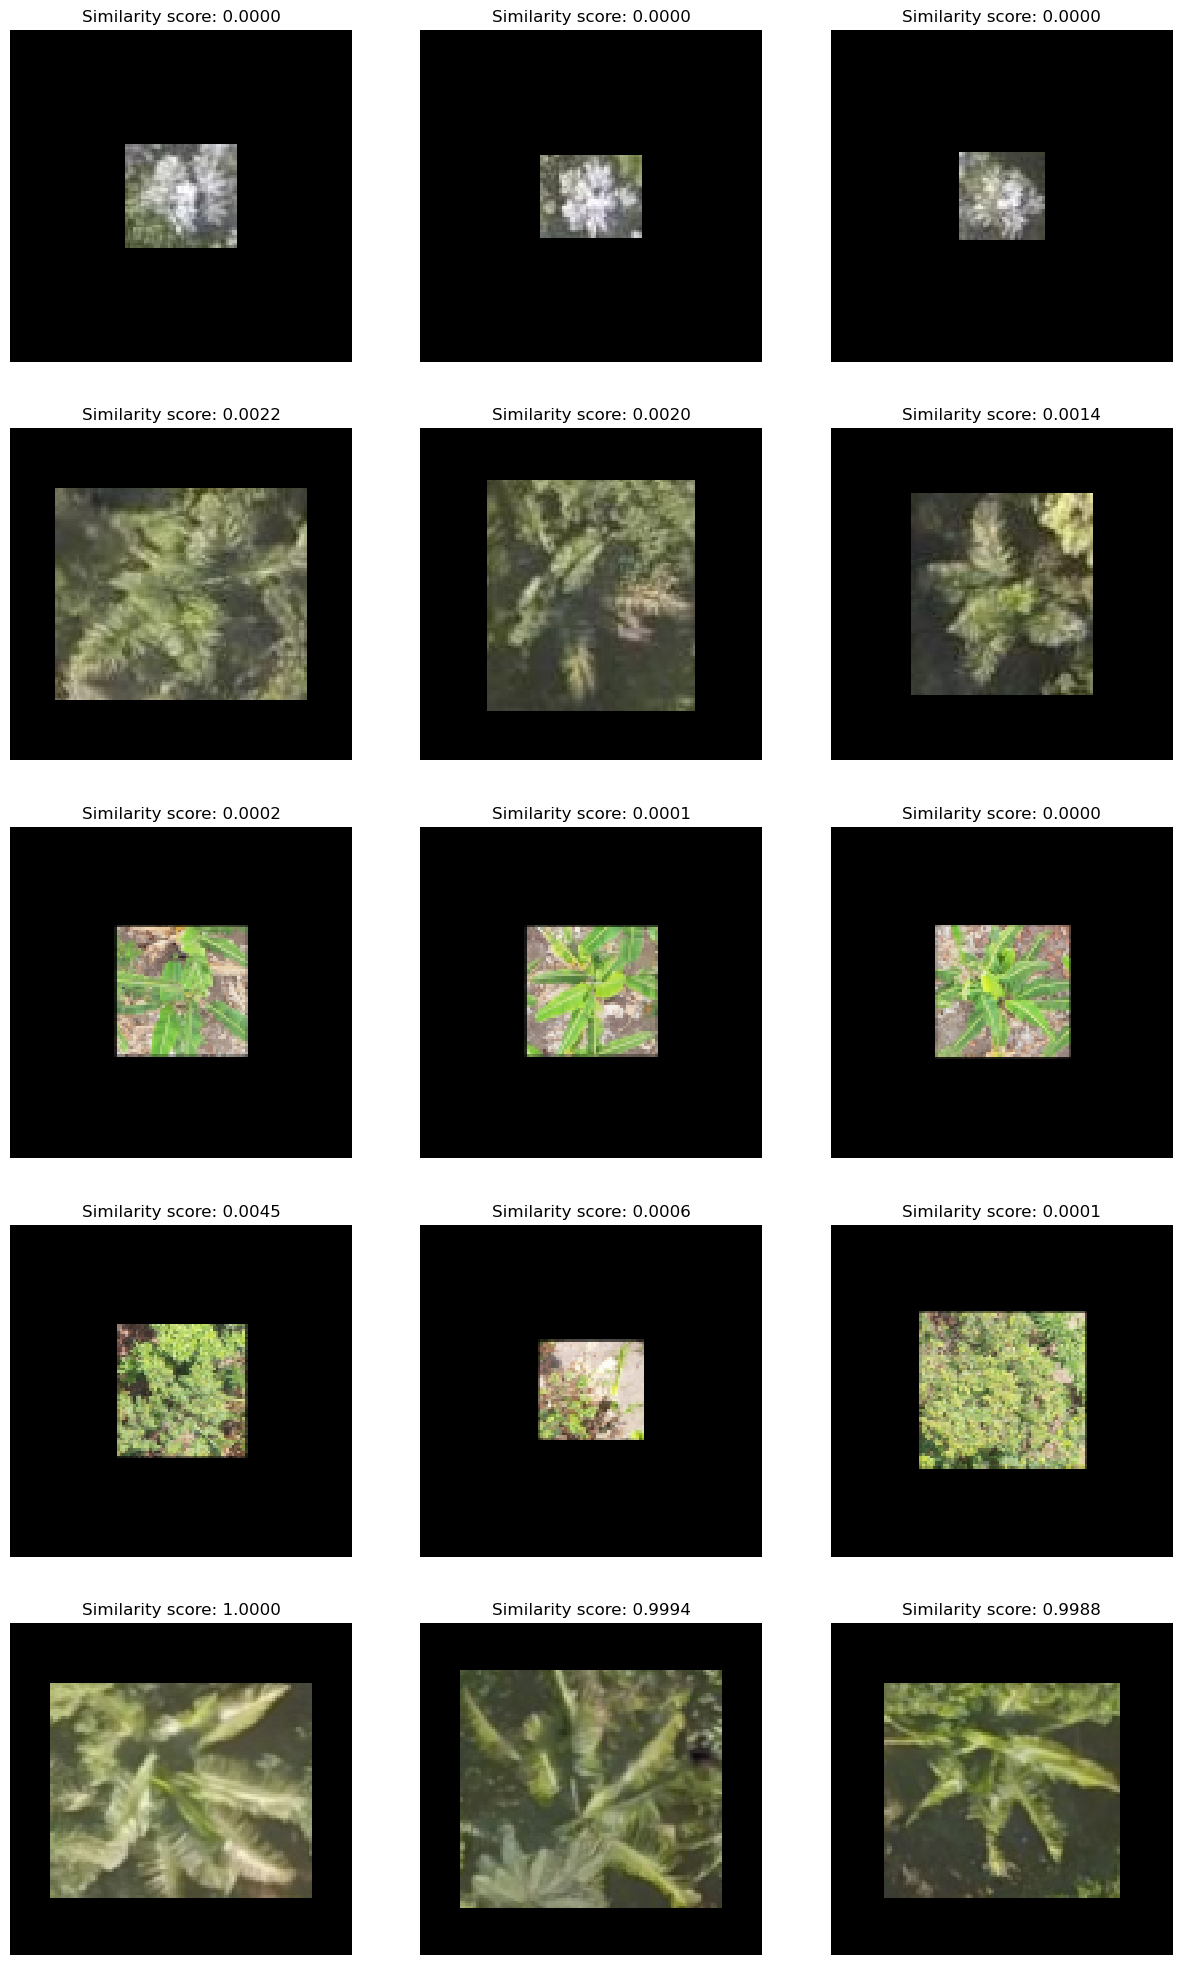

In [8]:
# Plot three most similar images per class
fig, axs = plt.subplots(len(class_data), 3, figsize=(15, 25))
for class_i, ax_id in zip(class_data.keys(), range(len(class_data))):
    # Get the indices of the three highest similarity scores
    scores = similarity_scores[class_i]
    idx = np.argsort(scores)[::-1][0:3] # Get the three highest scores (excluding the first three)
    # Plot the three most similar images
    for i in range(3):
        class_data[class_i]['X'][idx[i]].astype('int').plot.imshow(ax=axs[ax_id, i])
        axs[ax_id, i].set_title(f"Similarity score: {scores[idx[i]]:.4f}")
        axs[ax_id, i].axis('off')

## Plot the histogram of the similarity scores per class

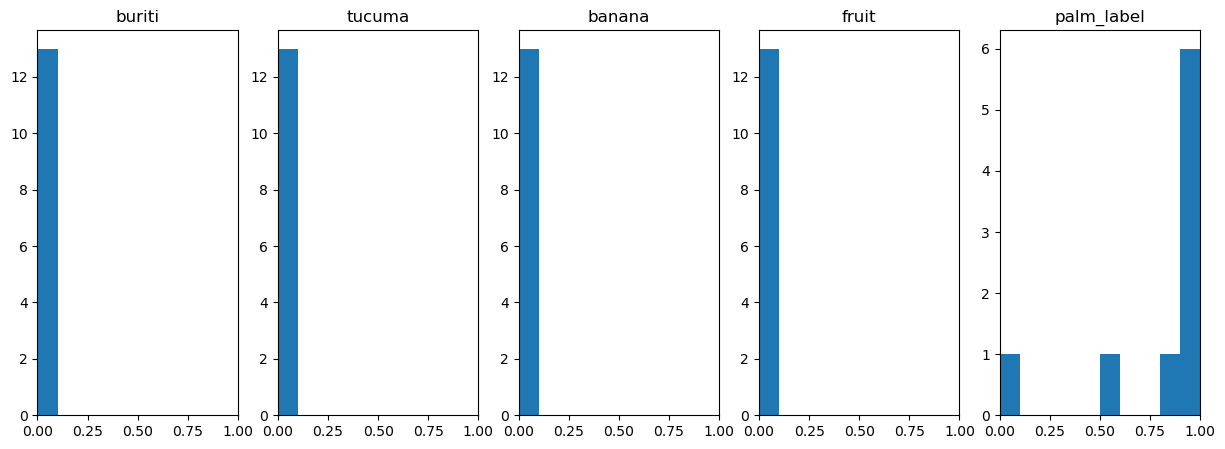

In [10]:
# Histogram of similarity scores per class
fig, axs = plt.subplots(1, len(class_data), figsize=(15, 5))
for class_i, ax_id in zip(class_data.keys(), range(len(class_data))):
    axs[ax_id].set_xlim(0, 1)
    #plot histogram with every 0.1 bin
    axs[ax_id].hist(similarity_scores[class_i], bins=np.arange(0, 1.1, 0.1))
    axs[ax_id].set_title(f"{class_map[class_i]}")